## This is a review of the New York State OASAS Medicaid Trend Recipient Summary data for years 2015 - 2017
Author: Aiden Johnson  
Date: 9/22/18  
Data: https://www.kaggle.com/new-york-state/nys-oasas-medicaid-trend-recipient-summary-profile

This profile shows a detailed summary of recipients, units of service, paid claim dollars, dollars per individual and dollars per units of service for services reimbursed by Medicaid Fee for Service billing as well as Medicaid Managed Care Plans (beginning with SFY 2016-2017) for chemical dependence and non-chemical dependence services received for the current consecutive 3 state fiscal year window for which data is available and analyzed.

In [2]:
from string import ascii_letters
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Review The Data Table Layout:

In [3]:
file="oasas-medicaid-trend-detailed-recipient-summary-profile-current-3-year-window.csv"
df=pd.read_csv(file)
df.head()

,County,Services,Recipients,Claims,Dollars Recipients,Dollars Claims,Dollars,SFY
0,Albany,Clinic Other,0,0,0.00000,0.000000,0.00,2015
1,Albany,Clinic Other,0,0,0.00000,0.000000,0.00,2016
2,Albany,Clinic Other,1,2,0.00000,0.000000,0.00,FFS2017
3,Albany,Clinic Other,1,2,770.40000,385.200000,770.40,MC2017
4,Albany,DOH All Other Services,2598,82807,4495.81348,141.052368,11680123.42,2015


Find the number null values in the data set by column:

In [4]:
df.isnull().sum()

County                0
Services              0
Recipients            0
Claims                0
Dollars Recipients    0
Dollars Claims        0
Dollars               0
SFY                   0
dtype: int64

That's Amazing, no null values! This is the joy of using pre-cleaned data I suppose.

In [5]:
cnt=len(df.County.unique())
print("The number of unique counties in NY is", cnt)

The number of unique counties in NY is 61


The Description of each level of the Service variable in no particular order.

In [6]:
pd.value_counts(df['Services'].values, sort=False)

OP Rehabilitation (Hospital)                                        244
Office Mental Health (OMH) Licensed Psychiatric Inp                 244
Residential Rehab for Youth                                         244
All Medicaid Services                                               244
OP CD for Youth (Freestanding)                                      244
All Outpatient (OP) Services                                        244
All Methadone Services                                              244
OP Clinc (Freestanding)                                             244
All Residential Services                                            244
OP CD for Youth (Hospital)                                          244
OPWDD Services                                                      244
DOH Emergency Room Services                                         244
DOH Other Prescriptions                                             244
Methadone Maintenance Treatment (Buprenorphine)                 

General summary stats table:

In [7]:
df.describe()

,Recipients,Claims,Dollars Recipients,Dollars Claims,Dollars
count,10980.000000,1.098000e+04,10980.000000,10980.000000,1.098000e+04
mean,1343.576138,9.692298e+04,4317.288716,265.570673,1.139155e+07
std,9998.541102,1.303950e+06,9542.922607,1501.144127,1.896415e+08
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.000000,3.395000e+02,1205.194965,69.691461,5.228471e+04
75%,306.000000,5.783000e+03,4879.614390,234.315592,5.584459e+05
max,181663.000000,5.740960e+07,156637.030000,119816.863330,1.063656e+10


In [8]:
#fix the year variable by removing characters, converting to numeric, and droppping old column
yr=df.SFY.apply(lambda x: x.replace('MC',''))
df['year']=pd.to_numeric(yr.str.replace('FFS',''))
df.drop(['SFY'], axis=1, inplace=True)

Now the data is ready for some initial exploratory data analysis (EDA). Firstly, we need to determine the type of data we are working with. the info command helps with that. This is a small data set with only 8 columns and 10,980 rows. Also Dollars Recients and Dollars Claims are derived from other columns within the data set, descriptions in table below. It may be tricky to develop some hypothesis worth testing with these data, I can atleast do more thorough EDA.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 8 columns):
County                10980 non-null object
Services              10980 non-null object
Recipients            10980 non-null int64
Claims                10980 non-null int64
Dollars Recipients    10980 non-null float64
Dollars Claims        10980 non-null float64
Dollars               10980 non-null float64
year                  10980 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 686.3+ KB


## Questions for consideration:
    1. Are there more claims in 2017 than 2016 & 2015?  
    2. Are there more unique Recipients in 2017 than 2016 & 2015?  
    3. Is the cost or Dollars per Claim going down over time?  
    4. Is the cost or Dollars per Recipient going down over time?
    
Number of Claims is an obvious objective for analysis. But first let's look at the correlation coefs between Claims and other variables.

In [10]:
core = df.corr().Claims

## Claims correlation bar plot

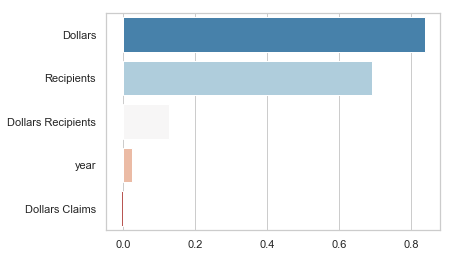

In [11]:
#make correlation plots
x=pd.DataFrame(core.sort_values(ascending = False))
names = list(x.index)
values = list(x.Claims)
del values[0]
del names[0]
#f, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=values, y=names, palette="RdBu_r")

## High correlation among Claims, Dollars, and Recipients
If we review the definition of these variables it's clear why they are so highly correlated.

## Data Descriptions

| Variable | Definition | Description |
|:------------ | :------------ | :--------- |
|County  | County of fiscal responsibility, which is typically the county of recipient’s residence|  
|Recipients  | Number of unique Medicaid enrollees for whom a claim was paid for a type of service received during the State Fiscal Year (SFY) | Number of unique enrollees per service type|
|Claims | The number of service units (e.g. days, visits, weeks) for which Medicaid paid during a SFY | Number of claims |
|Dollars Recipient | The dollar amount paid by Medicaid for services rendered divided by the number of recipients who received services during the SFY | *avg cost in dollar per recipient |
|Dollars Claims | The dollar amount paid by Medicaid for services rendered divided by the number of claims submitted during the SFY | *avg cost in dollars per claim |

## Data summaries by County as well as year could indicate some interesting trends worth further review.

In [12]:
cnty_grouped = df.groupby(['County','year']).agg({"Claims": [sum],
                                            "Dollars":[sum],
                                            "Recipients":[sum],"Dollars Recipients":[sum],
                                                 "Dollars Claims": [sum]}) 
# Using ravel, and a string join, we can create better names for the columns:
cnty_grouped.columns = ["_".join(x) for x in cnty_grouped.columns.ravel()]

In [13]:
cnty_grouped=cnty_grouped.reset_index()
cnty_grouped.head()

,County,year,Claims_sum,Dollars_sum,Recipients_sum,Dollars Recipients_sum,Dollars Claims_sum
0,Albany,2015,947685,1.217043e+08,25244,161785.925585,10133.390711
1,Albany,2016,1072220,1.294727e+08,26358,169701.195096,9638.354131
2,Albany,2017,3696602,5.336249e+08,61536,466582.594336,29161.025224
3,Allegany,2015,90965,1.246731e+07,3602,123653.989284,9326.940921
4,Allegany,2016,99409,1.431068e+07,3537,125523.436729,9945.070839


In [14]:
cnty_sorted=cnty_grouped.sort_values(by=['Claims_sum','Dollars_sum', 'Recipients_sum','Dollars Recipients_sum',
                                        "Dollars Claims_sum"], ascending=False)
cnty_sorted.head(10)

,County,year,Claims_sum,Dollars_sum,Recipients_sum,Dollars Recipients_sum,Dollars Claims_sum
146,Statewide,2017,367069990,4.215589e+10,4099152,589913.497447,29348.745231
83,NY City,2017,202625826,2.554952e+10,1822868,724757.503913,32439.765676
144,Statewide,2015,89839370,1.047027e+10,1657110,222849.347596,11357.941436
145,Statewide,2016,75197825,9.913455e+09,1619971,212386.817318,11583.307953
81,NY City,2015,56027501,6.342246e+09,781241,266232.232455,12046.905538
82,NY City,2016,37803424,5.364606e+09,692426,263402.425554,12747.022483
41,Erie,2017,25435074,2.113945e+09,266290,469348.037766,22843.878975
152,Suffolk,2017,17314470,2.168663e+09,253916,514643.886621,31622.641598
77,Monroe,2017,16126070,8.401612e+08,238914,264832.961284,18405.244871
176,Westchester,2017,11309044,1.427917e+09,131120,576460.565161,26776.354682


## 1. Are there more claims in 2017 than 2016 & 2015?  

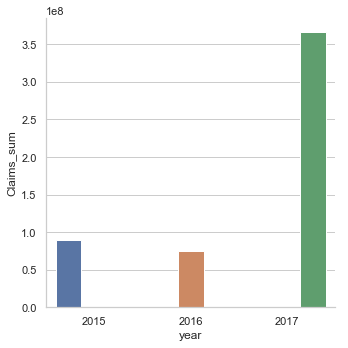

In [15]:
#select statewide data only
sw=cnty_grouped['County']== "Statewide"
state=cnty_grouped[sw]
state
sns.catplot(x="year", y="Claims_sum", hue="year", kind="bar", data=state);

In [16]:
state

,County,year,Claims_sum,Dollars_sum,Recipients_sum,Dollars Recipients_sum,Dollars Claims_sum
144,Statewide,2015,89839370,1.047027e+10,1657110,222849.347596,11357.941436
145,Statewide,2016,75197825,9.913455e+09,1619971,212386.817318,11583.307953
146,Statewide,2017,367069990,4.215589e+10,4099152,589913.497447,29348.745231


  ##  2. Are there more unique Recipients in 2017 than 2016 & 2015? 

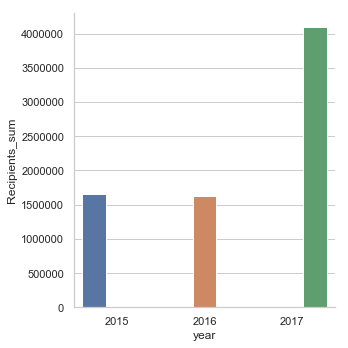

In [17]:
sns.catplot(x="year", y="Recipients_sum", hue="year", kind="bar", data=state);

In [18]:
#sns.catplot(x="year", y="Dollars Recipients_sum", hue="year", kind="bar", data=state);

In [19]:
#sns.catplot(x="year", y="Dollars Claims_sum", hue="year", kind="bar", data=state);

   In the year 2017 Medicaid paid many more Claims, spent more Dollars and had more total recipients at the total NY State level than in 2015 or 2016. NY City is also higher in all three categories than any other county. This is not necessarily a surprise, however, does indicate that normalizing by population counts would improve summary data review substantially. 

   The state wide dollars per recipient for 2015 and 2016 are comparable. In 2017 the Dollars per recipient is more than double of 2015 or 2016. This indicates that perhaps some higher cost services are being provided more frequently given the number of unique recipients is also higher in 2017. Similarly the number of dollars spent per claim has also more than doubled for 2017 over 2015 & 2016. Perhaps the cost of services increased substantially in 2017, however, it seems more likely that both cost per service and the number of high cost services is trending up for 2017. Now let's consider some data summaries by treatment type to disentangle that seeming increase in cost per Claim and per Recipient.

In [20]:
#remove Statewide and NY City and other statewide rows
dfc=cnty_grouped.loc[~cnty_grouped.County.isin(["Statewide","NY City","NYS OMR/DD", "NYS OMH"]),:]
#pd.value_counts(dfc['County'].values, sort=False) #check ofr non-County values
dfc.head()

,County,year,Claims_sum,Dollars_sum,Recipients_sum,Dollars Recipients_sum,Dollars Claims_sum
0,Albany,2015,947685,1.217043e+08,25244,161785.925585,10133.390711
1,Albany,2016,1072220,1.294727e+08,26358,169701.195096,9638.354131
2,Albany,2017,3696602,5.336249e+08,61536,466582.594336,29161.025224
3,Allegany,2015,90965,1.246731e+07,3602,123653.989284,9326.940921
4,Allegany,2016,99409,1.431068e+07,3537,125523.436729,9945.070839


## 3. How is spending per claim changing over time?

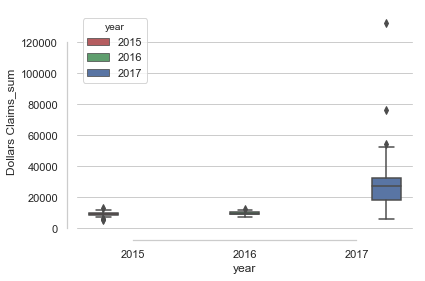

In [21]:
sns.boxplot(x="year", y="Dollars Claims_sum",
            hue="year", palette=["r","g" ,"b"],
            data=dfc)
sns.despine(offset=10, trim=True)

## 4. How is spending per recipient changing over time?

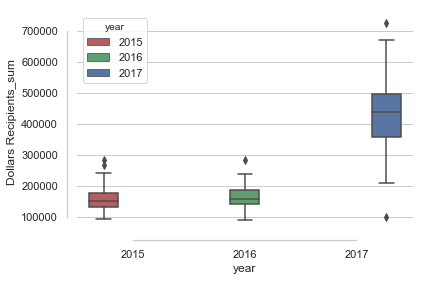

In [22]:
sns.boxplot(x="year", y="Dollars Recipients_sum",
            hue="year", palette=["r","g" ,"b"],
            data=dfc)
sns.despine(offset=10, trim=True)

## Data summaries by Services as well as year 

In [23]:
#remove statewide data from data frame for accurate summaries by Services.
df=df.loc[~df.County.isin(["Statewide","NY City","NYS OMR/DD", "NYS OMH"]),:] 
service_grouped = df.groupby(['Services','year']).agg({"Claims": [sum],
                                            "Dollars":[sum],
                                            "Recipients":[sum],
                                            "Recipients":[sum],
                                            "Dollars Recipients":[sum],
                                            "Dollars Claims": [sum]}) 
service_grouped.columns = ["_".join(x) for x in service_grouped.columns.ravel()]
service_grouped=service_grouped.reset_index()
service_grouped.head(10)
service_sorted=service_grouped.sort_values(by=['Claims_sum','Dollars_sum', 'Recipients_sum','Dollars Recipients_sum',
                                       "Dollars Claims_sum"], ascending=False)
service_sorted.head(10)

,Services,year,Claims_sum,Dollars_sum,Recipients_sum,Dollars Recipients_sum,Dollars Claims_sum
11,All Medicaid Services,2017,51663474,5.293758e+09,203040,2.716971e+06,12540.221840
17,All Non CD Services,2017,42453408,4.597232e+09,203040,2.366250e+06,13223.944477
29,DOH All Other Services,2017,13057266,8.152220e+08,196476,4.462329e+05,7872.373322
10,All Medicaid Services,2016,11264677,1.401591e+09,100057,7.498659e+05,7464.864221
9,All Medicaid Services,2015,10176496,1.270918e+09,94142,7.074137e+05,7364.238865
35,DOH Inpatient (Hospital),2017,9362584,2.338418e+09,65022,3.534701e+06,57975.373877
2,All Chemical Dependence (CD) Services,2017,9210066,6.965261e+08,203040,3.507209e+05,10704.796365
38,DOH OP Other Services,2017,7965162,8.465433e+08,191016,5.053188e+05,14410.620644
16,All Non CD Services,2016,7723869,1.066267e+09,100057,5.800765e+05,8077.114446
15,All Non CD Services,2015,6936723,9.636708e+08,94142,5.472402e+05,7997.195830


In [24]:
#service_grouped.to_csv("Services Sum table.csv", sep=',')

Based on these data summaries by services its clear that more people are recipients in 2017 for all medicaid services. The number of grouped service claims such as "All Chemical Dependence Services" in 2017 exceed the number of all Medicaid claims for 2016. Additionally, the number of recipients in 2017 is over twice the number of recipients for all medicaid services in 2015. Interesting the number of All Non-Chemical Dependence Services in 2017 exceeded the number of All Non CD services in 2015, followed by 2016. This could indicate an increase in chemical dependence across the population from 2015 to 2016; however, it is more likely that with the passing of Medicaid expansion there was a continued increase in the number of medicaid recipients.

In [25]:
#seperate out years by service for comparison
from functools import reduce
sw=service_sorted['year']== 2015
serv15=service_sorted[sw]
sw=service_sorted['year']== 2016
serv16=service_sorted[sw]
sw=service_sorted['year']== 2017
serv17=service_sorted[sw]
dfs = [serv15,serv16,serv17]
df_final = reduce(lambda left,right: pd.merge(left,right,on='Services'), dfs)

In [26]:
df_final.head()

,Services,year_x,Claims_sum_x,Dollars_sum_x,Recipients_sum_x,Dollars Recipients_sum_x,Dollars Claims_sum_x,year_y,Claims_sum_y,Dollars_sum_y,Recipients_sum_y,Dollars Recipients_sum_y,Dollars Claims_sum_y,year,Claims_sum,Dollars_sum,Recipients_sum,Dollars Recipients_sum,Dollars Claims_sum
0,All Medicaid Services,2015,10176496,1.270918e+09,94142,707413.719121,7364.238865,2016,11264677,1.401591e+09,100057,749865.926132,7464.864221,2017,51663474,5.293758e+09,203040,2.716971e+06,12540.221840
1,All Non CD Services,2015,6936723,9.636708e+08,94142,547240.193735,7997.195830,2016,7723869,1.066267e+09,100057,580076.507381,8077.114446,2017,42453408,4.597232e+09,203040,2.366250e+06,13223.944477
2,All Chemical Dependence (CD) Services,2015,3239773,3.072476e+08,94142,160173.525388,5808.385036,2016,3540808,3.353245e+08,100057,169789.418751,5947.652665,2017,9210066,6.965261e+08,203040,3.507209e+05,10704.796365
3,DOH All Other Services,2015,2512786,4.505799e+08,90376,276538.103719,9749.671117,2016,3051390,5.236658e+08,96437,310441.422464,9604.840050,2017,13057266,8.152220e+08,196476,4.462329e+05,7872.373322
4,DOH OP Other Services,2015,2508994,1.674217e+08,85911,91795.829763,4282.512494,2016,2815489,1.921714e+08,92540,100327.575764,4357.602336,2017,7965162,8.465433e+08,191016,5.053188e+05,14410.620644


In [27]:
df_final['dollars1615']=df_final['Dollars_sum_y']-df_final['Dollars_sum_x']
df_final['dollars1716']=df_final['Dollars_sum']-df_final['Dollars_sum_y']

In [28]:
df_final.head()

,Services,year_x,Claims_sum_x,Dollars_sum_x,Recipients_sum_x,Dollars Recipients_sum_x,Dollars Claims_sum_x,year_y,Claims_sum_y,Dollars_sum_y,...,Dollars Recipients_sum_y,Dollars Claims_sum_y,year,Claims_sum,Dollars_sum,Recipients_sum,Dollars Recipients_sum,Dollars Claims_sum,dollars1615,dollars1716
0,All Medicaid Services,2015,10176496,1.270918e+09,94142,707413.719121,7364.238865,2016,11264677,1.401591e+09,...,749865.926132,7464.864221,2017,51663474,5.293758e+09,203040,2.716971e+06,12540.221840,1.306730e+08,3.892166e+09
1,All Non CD Services,2015,6936723,9.636708e+08,94142,547240.193735,7997.195830,2016,7723869,1.066267e+09,...,580076.507381,8077.114446,2017,42453408,4.597232e+09,203040,2.366250e+06,13223.944477,1.025962e+08,3.530965e+09
2,All Chemical Dependence (CD) Services,2015,3239773,3.072476e+08,94142,160173.525388,5808.385036,2016,3540808,3.353245e+08,...,169789.418751,5947.652665,2017,9210066,6.965261e+08,203040,3.507209e+05,10704.796365,2.807685e+07,3.612016e+08
3,DOH All Other Services,2015,2512786,4.505799e+08,90376,276538.103719,9749.671117,2016,3051390,5.236658e+08,...,310441.422464,9604.840050,2017,13057266,8.152220e+08,196476,4.462329e+05,7872.373322,7.308588e+07,2.915562e+08
4,DOH OP Other Services,2015,2508994,1.674217e+08,85911,91795.829763,4282.512494,2016,2815489,1.921714e+08,...,100327.575764,4357.602336,2017,7965162,8.465433e+08,191016,5.053188e+05,14410.620644,2.474972e+07,6.543719e+08


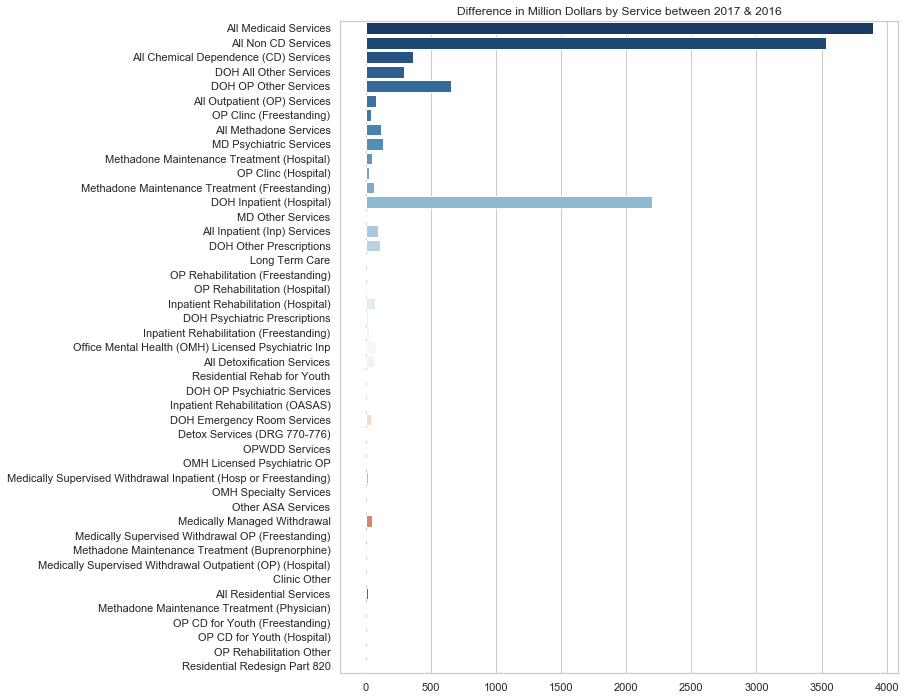

In [29]:
names = list(df_final['Services'])
values = list(df_final['dollars1716']/1000000)
f, ax = plt.subplots(figsize=(10, 12))
sns.set(style="whitegrid")
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('Difference in Million Dollars by Service between 2017 & 2016')

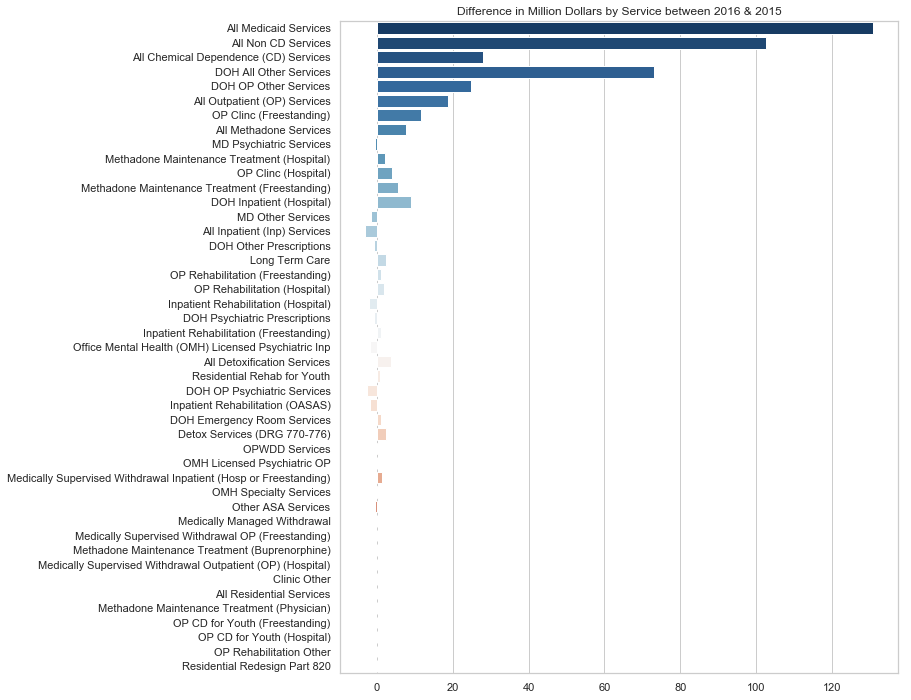

In [30]:
names = list(df_final['Services'])
values = list(df_final['dollars1615']/1000000)
f, ax = plt.subplots(figsize=(10, 12))
sns.set(style="whitegrid")
sns.barplot(x=values, y=names, palette="RdBu_r").set_title('Difference in Million Dollars by Service between 2016 & 2015')

Looking at the differences in Dollars by Service between 2017 & 2016 as well as 2016 & 2015. DOH inpatient (Hospital) dollars went up dramatically from 2016 to 2017. Many of the other services Dollars went up as well in that time period. Further review at more granular level may indicate a transition to more costly services making up a larger portion of the treatment.

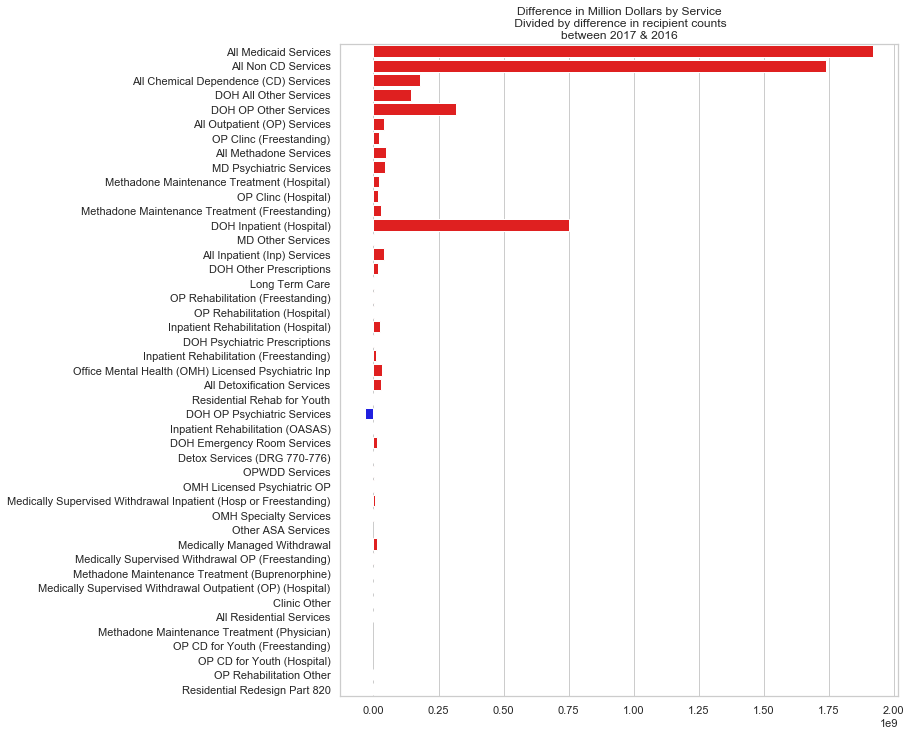

In [31]:
names = list(df_final['Services'])
values = list(df_final['dollars1716']/(df_final['Recipients_sum']/df_final['Recipients_sum_y']))
f, ax = plt.subplots(figsize=(10, 12))
sns.set(style="whitegrid")
clrs = ['red' if (x > 0) else 'blue' for x in values]
sns.barplot(x=values, y=names,palette=clrs).set_title('Difference in Million Dollars by Service\n Divided by difference in recipient counts\nbetween 2017 & 2016')

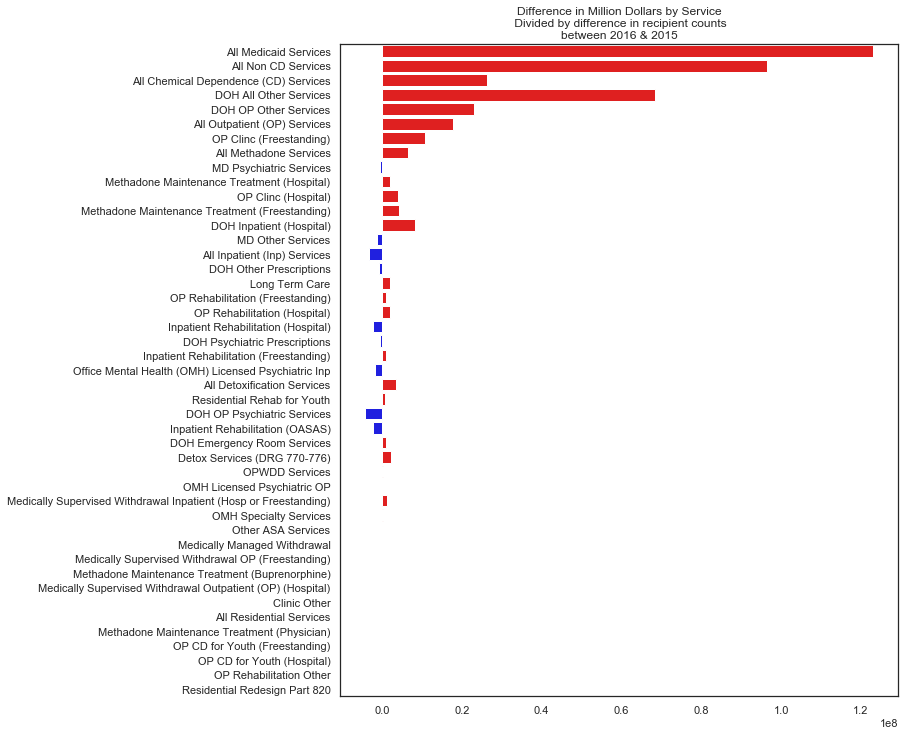

In [44]:
names = list(df_final['Services'])
values = list(df_final['dollars1615']/(df_final['Recipients_sum_y']/df_final['Recipients_sum_x']))
f, ax = plt.subplots(figsize=(10, 12))
sns.set(style="whitegrid")
clrs = ['red' if (x > 0) else 'blue' for x in values]
sns.barplot(x=values, y=names, palette=clrs).set_title('Difference in Million Dollars by Service\n Divided by difference in recipient counts\nbetween 2016 & 2015')

## Create dummy variables for County and Services

With a County only cleaned data set, let's look at correlations across the entire data set including by County and Services. In order to do this we need to create indicator aka dummy variables for each level of County and Service.

In [33]:
df_txt = pd.get_dummies(df['Services'])
df = pd.concat([df, df_txt], axis=1)
df.drop(['Services'], axis=1, inplace=True)

In [34]:
#df.head()

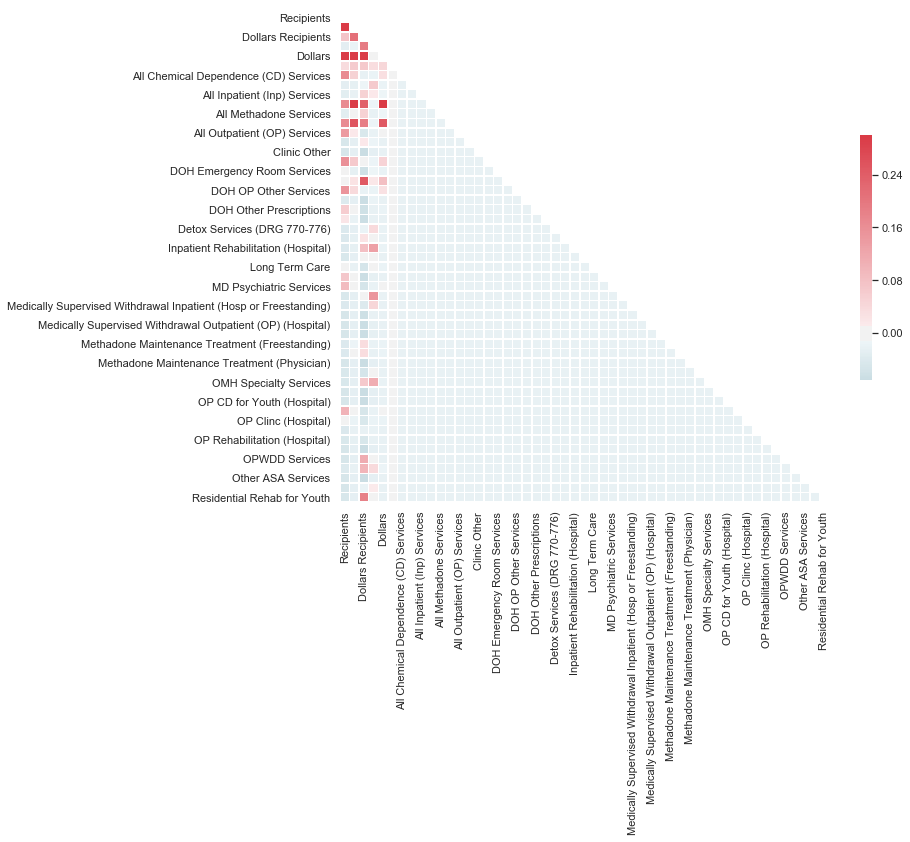

In [35]:
# Correction Matrix Plot
sns.set(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## How has the number of Dollars and Services spent changed thru time by County?

In [36]:
#pip3 install bokeh
#import bokeh.sampledata
#bokeh.sampledata.download()

In [37]:
dfc_sorted=dfc.sort_values(by=['County'], ascending=True)
dfc_sorted.head(10)
sw=dfc_sorted['year']== 2015
cnty15=dfc_sorted[sw]
sw=dfc_sorted['year']== 2016
cnty16=dfc_sorted[sw]
sw=dfc_sorted['year']== 2017
cnty17=dfc_sorted[sw]
cnty17.head()

,County,year,Claims_sum,Dollars_sum,Recipients_sum,Dollars Recipients_sum,Dollars Claims_sum
2,Albany,2017,3696602,5.336249e+08,61536,466582.594336,29161.025224
5,Allegany,2017,333330,3.730201e+07,8480,317668.865191,26281.033992
8,Broome,2017,3420836,1.830617e+08,54728,256617.509105,29939.584433
11,Cattaraugus,2017,1103222,1.341640e+08,22232,425044.825171,29977.910718
14,Cayuga,2017,1127904,1.624594e+08,20714,621601.533059,36343.318913


In [38]:
from colour import Color
red = Color("red")
blue = Color("blue")
rl=list(red.range_to(blue, 3))
#print(rl[1].hex_l)
#print(rl[2].hex_l)

In [39]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment
from bokeh.io import output_notebook, push_notebook, show

counties = {
    code: county for code, county in counties.items() if county["state"] == "ny"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]
#colors= ['#052049', '#506380', '#9BA6B6', '#E6E9ED']
colors2=['#ffcc00','#00ff66','#00ccff','#0000ff']
county_names = [county['name'] for county in counties.values()]
cnty15=(cnty15.loc[cnty15['County'].isin(county_names)])
county_rates = cnty15['Dollars Recipients_sum'].tolist()
county_colors = [colors2[int(rate/100000)] for rate in county_rates]


source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    color=county_colors,
    name=county_names,
    rate=county_rates,
    
))
output_notebook()

/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


Loading BokehJS ...

In [40]:
TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="New York Dollars per Recipient in 2015", tools=TOOLS)

p.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.7,
          line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Dollars per Recipient", "$@rate"),
    ("(Long, Lat)", "($x, $y)"),
]
show(p)

In [41]:
cnty16=(cnty16.loc[cnty16['County'].isin(county_names)])
county_rates = cnty16['Dollars Recipients_sum'].tolist()

county_colors = [colors2[int(rate/100000)] for rate in county_rates]
source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    color=county_colors,
    name=county_names,
    rate=county_rates,
    
))
output_notebook()
TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="New York Dollars per Recipient in 2016", tools=TOOLS)

p.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.7,
          line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Dollars per Recipient", "$@rate"),
    ("(Long, Lat)", "($x, $y)"),
]
show(p)

/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


Loading BokehJS ...

In [42]:
cnty17=(cnty17.loc[cnty17['County'].isin(county_names)])
county_rates = cnty17['Dollars Recipients_sum'].tolist()

county_colors = [colors2[int(rate/1000000)] for rate in county_rates]
source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    color=county_colors,
    name=county_names,
    rate=county_rates,
    
))
output_notebook()
TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="New York Dollars per Recipient in 2017", tools=TOOLS)

p.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.7,
          line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Dollars per Recipient", "$@rate"),
    ("(Long, Lat)", "($x, $y)"),
]
show(p)

/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


Loading BokehJS ...

This dataset is so small that developing a predictive model hypothesis seemed so arbitrary and not necessarily a true example of the approach I would take in my own work. 

In [43]:
#df=df.loc[~df.County.isin(["Statewide","NY City","NYS OMR/DD", "NYS OMH"]),:] 
#df_cn = pd.get_dummies(df['County'])
#df = pd.concat([df, df_cn], axis=1)
#df.drop(['County'], axis=1, inplace=True)